In [11]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import randint

import gym
import gym_gigticket


# Notebook to explore the set up of the problem. 

For a realistic implementation, the environment needs to fairly replicate reality.

The below graphs out a demand surface for gig ticket sales as a function of price and time until the gig. 



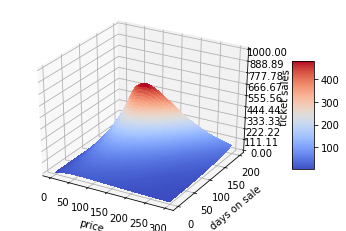

In [15]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 300, 1)
Y = np.arange(0, 200, 1)
X, Y = np.meshgrid(X, Y)
Z = 0.985**(X) * (1/(0.985**Y))

Revenue = Z * X

# Plot the surface.
surf = ax.plot_surface(X, Y, Revenue, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 1000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('price')
ax.set_ylabel('days on sale')
ax.set_zlabel('ticket sales')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Gym environment.

By simulating a bunch of random actions lots of times you can get a feel for what a successful learn will look like.
The successful learning would obviously have to beat the best alternative which is likely better than a bunch of random simulations, but it gives an easy bench mark at which the learner needs to be able to beat. 


This environment is then created within a gym environment that can be used to train a reinforcement learner. 

In [34]:
env = gym.make('gigticket-v0')

In [35]:
# Simulate some random episodes and see what it looks like.

total_history = []

for episode in range(1000):
    env.reset()
    while env.done == False:
        
        action_option = [-10, 0 ,10]
        action_choice = randint(0,2)
        
        env.step(action_option[action_choice])
    
    total_history.append(env.history)

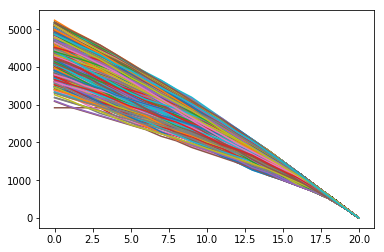

In [36]:
# Graph out what this would look like. 
import matplotlib.pyplot as plt

for simulation in range(len(total_history)):
    reward = total_history[simulation]['reward']
    days =  total_history[simulation]['days_remaining']

    plt.plot(days, reward)

Therefore for this particular set up of the environment, the pricing agent needs to be generating a reward of > 5000 to be performing 'okay'.